# Concrete dataset: artificial neural network
The following exercise is taken from <b> Machine Learning with R</b> by <b> Brett Lantz </b> (Third Edition)

The dataset used in the exercise is the <b>compressive strength of concrete</b> dataset. The dataset was orginainally published in a study by <b>I-Cheng Yeh</b> in 1998. The dataset here is downloaded from the textbook's github page. The dataset is also freely available at <b>UCI Machine Learning Repository</b>.

## Step 1: Collecting the data

In [1]:
concrete <- read.csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter07/concrete.csv")

## Step 1: Exploring and preparing the dataset

In [2]:
str(concrete)

'data.frame':	1030 obs. of  9 variables:
 $ cement      : num  141 169 250 266 155 ...
 $ slag        : num  212 42.2 0 114 183.4 ...
 $ ash         : num  0 124.3 95.7 0 0 ...
 $ water       : num  204 158 187 228 193 ...
 $ superplastic: num  0 10.8 5.5 0 9.1 0 0 6.4 0 9 ...
 $ coarseagg   : num  972 1081 957 932 1047 ...
 $ fineagg     : num  748 796 861 670 697 ...
 $ age         : int  28 14 28 28 28 90 7 56 28 28 ...
 $ strength    : num  29.9 23.5 29.2 45.9 18.3 ...


In [21]:
# Normalization is required: While there are two approaches, depending on the distribution of the data
# in this case min-max standardization is best

normalize <- function(x) {
    return((x - min(x))/ (max(x) - min(x)))
}

concrete_norm <- as.data.frame(lapply(concrete, normalize))
summary(concrete_norm$strength)
summary(concrete$strength)

# These tranformations will have to be applid in reverse to convert the results to the oriiginal scale of measurement

concrete_train <- concrete_norm[1:773,]
concrete_test <- concrete_norm[774:1030,]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2664  0.4001  0.4172  0.5457  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.33   23.71   34.45   35.82   46.13   82.60 

## Step 3: Training a model on the data

error,5.086089e+00
reached.threshold,9.468565e-03
steps,1.861000e+03
Intercept.to.1layhid1,1.528203e+00
cement.to.1layhid1,-3.924881e+00
slag.to.1layhid1,-2.176521e+00
ash.to.1layhid1,-6.338508e-01
water.to.1layhid1,2.046894e+00
superplastic.to.1layhid1,-1.245751e+00
coarseagg.to.1layhid1,1.560701e-01
fineagg.to.1layhid1,2.972799e-01


SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef



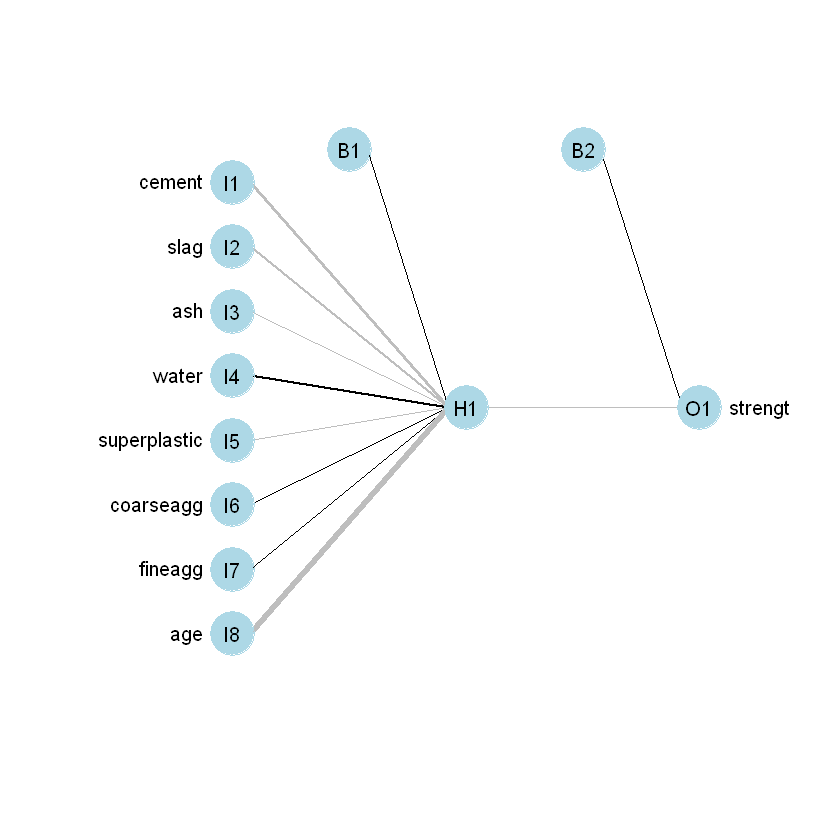

In [16]:
library(neuralnet)
concrete_model <- neuralnet(strength ~ cement + slag + ash + water + 
                            superplastic + coarseagg + fineagg + age, data = concrete_train)

concrete_model$result.matrix

library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
plot.nnet(concrete_model)

## Step 4: Evaluating model performance

In [25]:
model_results <- compute(concrete_model, concrete_test[1:8])
predicted_strength <- model_results$net.result

# since this is a numeric prediction, a confusion matrix does not make much sense. 
# The correlation between predicted and actual labels is a better evaluation criteria

cor(predicted_strength, concrete_test$strength)

0.8056709


- a fairly good result, given that there ist just one hidden layer with one node

## Step 5: Improving model performance

error,5.086089e+00
reached.threshold,9.468565e-03
steps,1.861000e+03
Intercept.to.1layhid1,1.528203e+00
cement.to.1layhid1,-3.924881e+00
slag.to.1layhid1,-2.176521e+00
ash.to.1layhid1,-6.338508e-01
water.to.1layhid1,2.046894e+00
superplastic.to.1layhid1,-1.245751e+00
coarseagg.to.1layhid1,1.560701e-01
fineagg.to.1layhid1,2.972799e-01


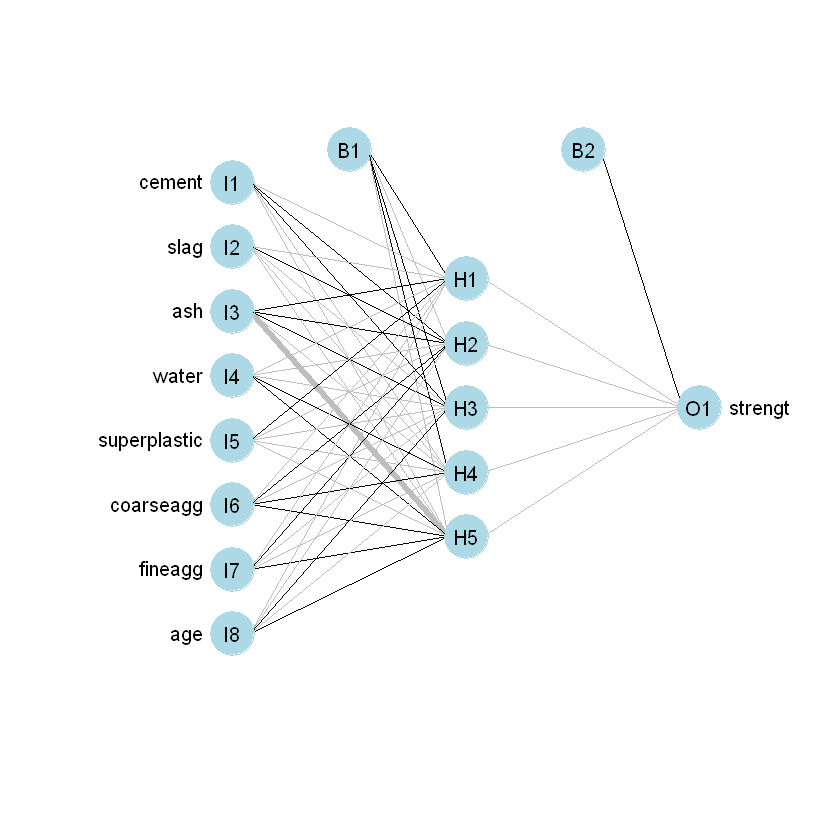

In [32]:
concrete_model2 <- neuralnet(strength ~ cement + slag + ash + water + 
                            superplastic + coarseagg + fineagg + age, data = concrete_train, 
                            hidden = 5)
plot.nnet(concrete_model2)
concrete_model$result.matrix

In [34]:
model_results2 <- compute(concrete_model2, concrete_test[1:8])
predicted_strength2 <- model_results2$net.result
cor(predicted_strength2, concrete_test$strength)

0.9256396


- A considerable improvement
- Yet, there might be room for improvement by 
    - including additional hidden layers
    - changing the activation function (e.g. from a sigmoid to a SmoothReLU)

ERROR: Error in eval(expr, envir, enclos): Objekt 'concrete_model_3' nicht gefunden


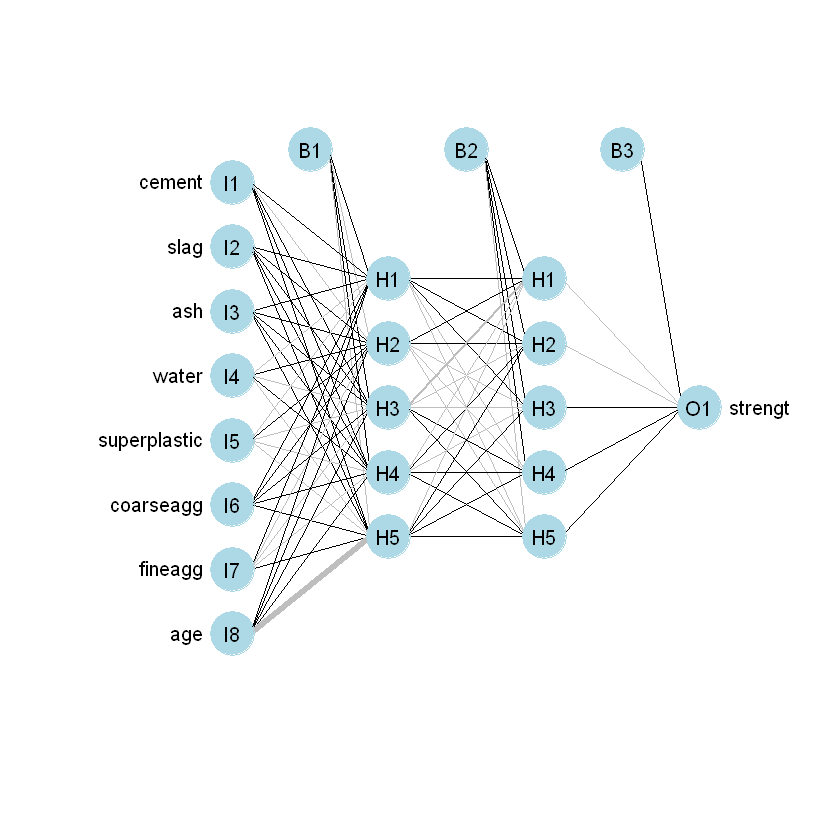

In [35]:
softplus <- function(x){
    log(1+exp(x))
}
set.seed(12345)
concrete_model3 <- neuralnet(strength ~ cement + slag + ash + water + 
                            superplastic + coarseagg + fineagg + age, data = concrete_train, 
                            hidden = c(5,5), act.fct = softplus)
plot.nnet(concrete_model3)
concrete_model3$results.matrix

In [38]:
model_results3 <- compute(concrete_model3, concrete_test[1:8])
predicted_strength3 <- model_results3$net.result
cor(predicted_strength3, concrete_test$strength)

0.9348395


- An improvement of about 1% accuracy

In [40]:
strengths <- data.frame(actual = concrete$strength[774:1030],
                       pred = predicted_strength3)
unnormalize <- function(x) {
    return((x * (max(concrete$strength)) - min(concrete$strength)) + min(concrete$strength))
}

strengths$pred_new <- unnormalize(strengths$pred)
strengths$error <- strengths$pred_new - strengths$actual

head(strengths)

,actual,pred,pred_new,error
,<dbl>,<dbl>,<dbl>,<dbl>
774,30.14,0.2860639,23.62888,-6.5111211
775,44.40,0.4777305,39.46054,-4.9394636
776,24.50,0.2840964,23.46636,-1.0336353
777,71.62,0.9446964,78.03192,6.4119240
778,36.30,0.4361824,36.02867,-0.2713317
779,38.46,0.5072858,41.90180,3.4418038
